# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

import warnings 
warnings.filterwarnings('ignore')
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
lrs = [1e-1, 5e-2, 1e-2, 1e-3]
opts = ['SGD', 'RMSprop', 'Adagrad', 'Adam']
epochs = 20
batch_size = 128


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in lrs:
    for opt in opts:
        print(opt,' optimizer with ',lr, ' learning rate')
    
        model = build_mlp(x_train.shape[1:])

        optimizer = None

        if opt == 'SGD':
            optimizer = keras.optimizers.SGD(lr = lr, momentum = 0.9, nesterov = True)
        elif opt == 'RMSprop':
            optimizer = keras.optimizers.RMSprop(lr = lr)
        elif opt == 'Adagrad':
            optimizer = keras.optimizers.Adagrad(lr = lr)
        else :
            optimizer = keras.optimizers.Adam(lr = lr, beta_1 = 0.9, beta_2 = 0.999)

        model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])

        history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, shuffle = True, validation_data = [x_test, y_test])

        name_tag = str(opt)+'_'+str(lr)
        results[name_tag] = {'train_loss' : history.history['loss'],
                             'valid_loss' : history.history['val_loss'],
                             'train_acc'  : history.history['acc'],
                             'valid_acc'  : history.history['val_acc'] }

SGD  optimizer with  0.1  learning rate
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 136us/step - loss: 14.3556 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/20
50000/50000 [==============================] - 7s 130us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/20
50000/50000 [==============================] - 7s 132us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/20
50000/50000 [==============================] - 7s 133us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/20
50000/50000 [==============================] - 7s 132us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/20
50000/50000 [==============================] - 7s 131us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/20
50000/50000 [==============================] - 7s 131us/ste

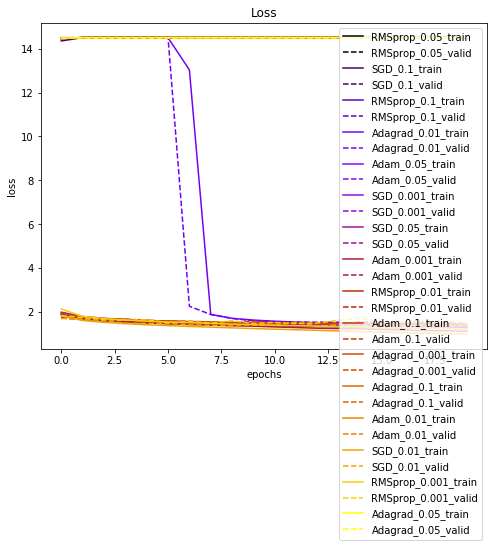

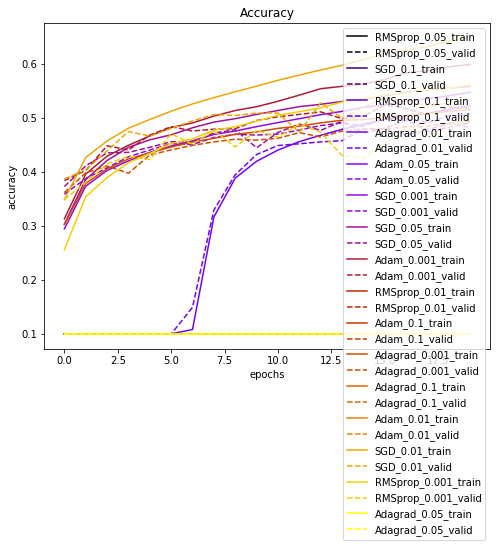

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

"""
將實驗結果繪出
"""

cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, len(results))]

plt.figure(figsize = (8,6))

for i, cond in enumerate(results.keys()):
  plt.plot(results[cond]['train_loss'], '-', label = cond + "_train", color = colors[i])
  plt.plot(results[cond]['valid_loss'],'--', label = cond + "_valid", color = colors[i])

plt.xlabel("epochs")
plt.ylabel('loss')
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
  plt.plot(results[cond]['train_acc'], '-', label = cond + "_train", color = colors[i])
  plt.plot(results[cond]['valid_acc'], '--',label = cond + "_valid", color = colors[i])

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()